# <b> DATA ANALYSIS : </b>

> <h2> <b>Exploring Job Hoppers: An Analysis of Jobseekers' Demographics and Work Histories</b></h2>

 <b> <h3>Description: </h3></b>

* The aim of this project is to analyze a pandas data frame called 'jobhopers' that contains information about job seekers. This data frame consists of columns such as enrollee_id, city, gender, education level, relevant experience, company size, and last new job. 
* The project seeks to explore this dataset by examining the demographics and work histories of jobseekers. The analysis includes investigating the distribution of enrollee_id across the dataset, exploring the city_development_index values, examining the gender and relevant experience of jobseekers, comparing education levels and major disciplines, investigating the experience level of jobseekers, exploring the company size and type, and examining the distribution of last new job. 
* By conducting this data exploration, the project aims to provide insights into the job-seeking patterns of individuals and offer valuable information for employers and recruiters looking to understand the job market better.

_____________________________________________________________________________________________________

### <b> Importing Libraries / Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### <b> Load the Dataset :


In [2]:
df = pd.read_csv(r'jobhoppers.csv')

print (f'Rows : {df.shape[0]}, Columns : {df.shape[1]}' )
df.head()

Rows : 19158, Columns : 14


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### <b> Cleaning the Dataset

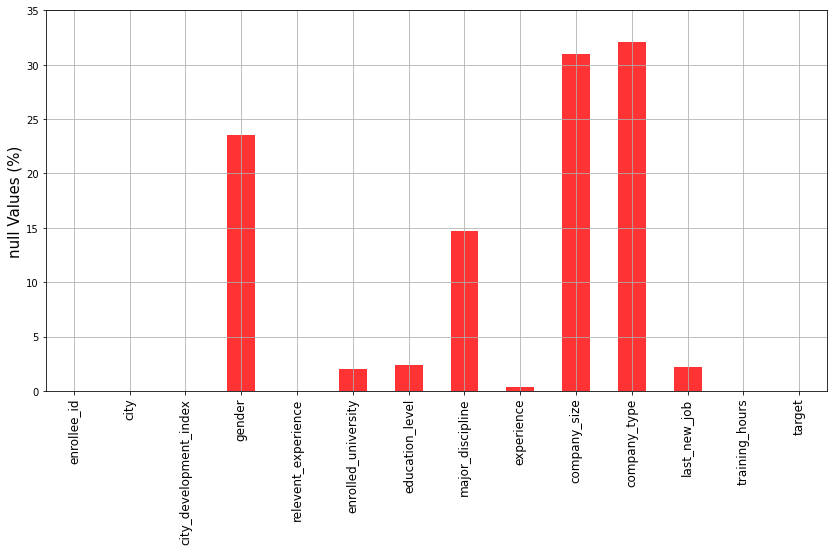

In [3]:
# Plotting the percentage of Null values present in each Column:
plt.figure(figsize = (14,7))
(df.isna().sum()/len(df)*100).plot(kind = 'bar', color = 'red', alpha = 0.8, width = 0.5)
plt.xticks(size = 12)
plt.yticks(np.arange(0,40,5))
plt.ylabel('null Values (%)', size = 15)
plt.grid()
plt.show()

> <b> Inferences : 

* Out of the eight columns or features in our dataset, 'company_type' has the highest number of null values, with approximately 33% of the values missing. 
* However, the other four columns have less than 5% of null values, and as such, we can remove those rows from the dataset without losing significant amounts of data.

In [4]:
# Imputing gender columns with the fill-forward method :
# df['gender'] = df['gender'].fillna(method='ffill')
df['gender'].dropna(inplace= True)

# Imputing the 'major_discipline' with the most frequent discipline.
# print (df['major_discipline'].value_counts())
df['major_discipline']  =    df['major_discipline'].fillna('STEM') 

# Imputing 'company_size' with the most frequent size of the companies.
df['company_size']  =    df['company_size'].fillna(value= '50-99') 

# Imputing 'company_type' with the most frequent type of the companies.
df['company_type']  =    df['company_type'].fillna(value= 'Pvt Ltd') 


# NOW DROPPING REST OF THE NULL VALUES FROM THE DATAFRAME :

df_updated = df.dropna() 

# DROPING THE DUPICATE DATA AS WELL :
df_updated = df_updated.drop_duplicates()

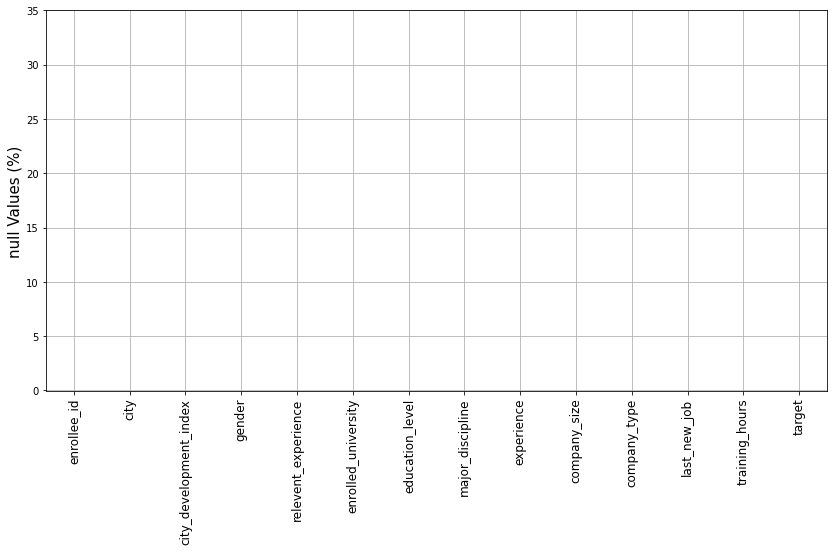

In [5]:
# Plotting the percentage of Null values present in each Column:
plt.figure(figsize = (14,7))
(df_updated.isna().sum()/len(df_updated)*100).plot(kind = 'bar', color = 'red', alpha = 0.8, width = 0.5)
plt.xticks(size = 12)
plt.yticks(np.arange(0,40,5))
plt.ylabel('null Values (%)', size = 15)
plt.grid()
plt.show()

### <b>  SEEMS WE HAVE NO NULL VALUES IN THE DATAFRAME :
___________________________________________________________

## <b> EXPLORATORY DATA ANALYSIS 

> Here, I will attempt to answer a few important questions based on the data we have for the Jobhopers.

In [6]:
# Our Updated DATASET :
print (f'Rows : {df_updated.shape[0]}, Columns : {df_updated.shape[1]}' )
df_updated.head()

Rows : 14151, Columns : 14


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0


________________
#### <b> Q1) How does the city_development_index vary across different cities in the dataset? Are there any cities with significantly higher or lower city_development_index values than others?

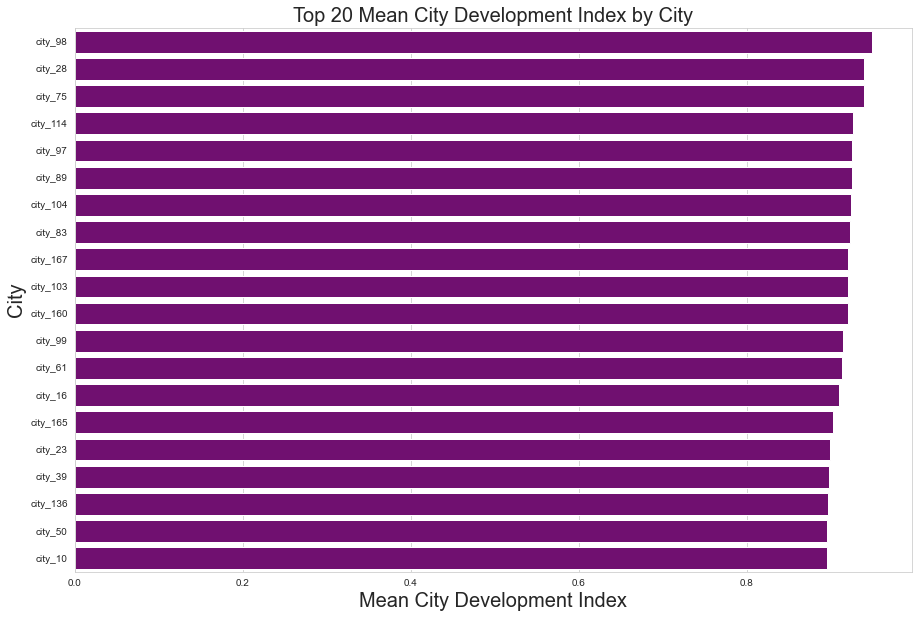

In [48]:
# group the data by city and calculate summary statistics
city_stats = df_updated.groupby('city')['city_development_index'].agg(['mean']).sort_values('mean', ascending= False)[:20]

# create a horizontal bar chart using seaborn
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')
sns.barplot(x=city_stats['mean'].values, y=city_stats.index, color='purple')
plt.title('Top 20 Mean City Development Index by City', size = 20)
plt.xlabel('Mean City Development Index', size = 20)
plt.ylabel('City', size = 20)
plt.show()

> <b> Inferences : 

* City 98 has the highest mean city development index, it can be inferred that this city is more developed compared to other cities in the dataset. It is possible that City 98 has better infrastructure, higher economic growth, more job opportunities, and a higher standard of living compared to other cities. This information can be useful for companies or organizations looking to expand their operations in a particular city or for individuals looking for job opportunities in a particular city.

_______________________________________
#### <b> Q2)How does gender vary across different jobhoper profiles in the dataset? Is there an even split between male and female jobhopers, or is one gender more prevalent than the other?

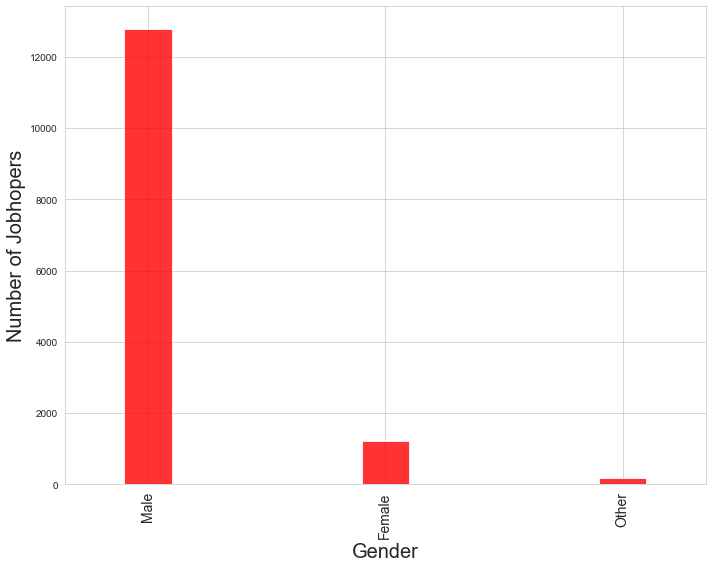

In [8]:
plt.figure(figsize = (10,8))
(df_updated['gender'].value_counts()).plot(kind = 'bar', width  = 0.2,alpha = 0.8, color= 'red')
plt.xticks(size = 14)
plt.ylabel('Number of Jobhopers', size = 20)
plt.xlabel('Gender', size = 20)
plt.tight_layout()
plt.show()

> <b> Inferences : 

* The data suggests a significant difference between males and other gender categories with respect to job hopping, implying that male candidates are more likely to change jobs compared to other gender categories.

_______________________________________
#### <b> Q3 What is the distribution of relevant experience among jobhopers in the dataset? Are there any jobhopers with significantly more or less relevant experience than others?

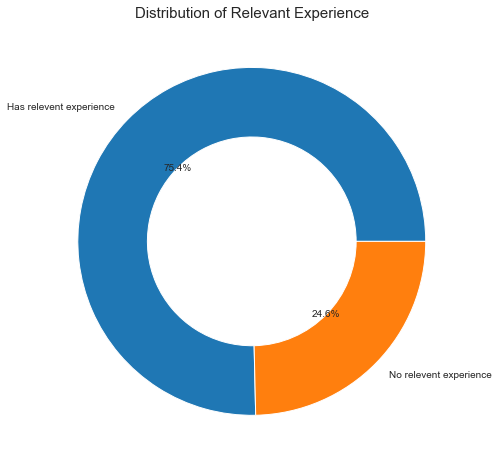

In [9]:
# group the data by relevant experience and count the number of jobhopers
relevent_exp_counts = df_updated.groupby('relevent_experience')['enrollee_id'].count()

# create a donut chart to visualize the distribution of relevant experience
plt.figure(figsize= (8,8))
plt.pie(relevent_exp_counts, labels=relevent_exp_counts.index ,wedgeprops=dict(width=0.4), autopct='%1.1f%%')

plt.title('Distribution of Relevant Experience', size = 15)
plt.show()

> <b> Inferences : 

* Based on the donut chart showing the distribution of relevant experience among jobhopers, it can be observed that approximately 75% of the candidates have relevant experience, while only around 25% of the candidates do not have relevant experience. This implies that a large majority of jobhopers in the dataset have relevant experience, which may have implications for recruitment and selection processes.

_______________________________________
#### <b> Q4) How do the different education levels of jobhopers in the dataset compare to one another? Are there any education levels that are overrepresented or underrepresented?

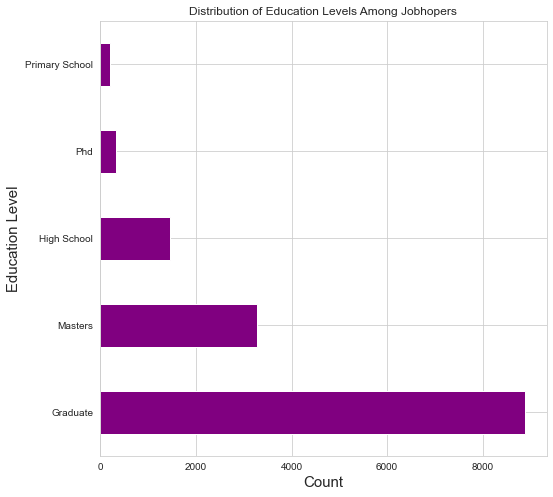

In [10]:
# Create a horizontal bar chart
plt.figure(figsize= (8,8))

(df_updated['education_level'].value_counts()).plot(kind='barh', color='purple')

# Set axis labels and title
plt.xlabel('Count', size = 15)
plt.ylabel('Education Level', size = 15)
plt.title('Distribution of Education Levels Among Jobhopers')

# Show the plot
plt.show()

> <b> Inferences :

* The results for the counts of education levels among jobhopers in the dataset show that the majority of candidates have completed their education up to the graduate level, followed by masters and high school education. On the other hand, only a small number of jobhopers have completed their education up to the Phd or primary school level.

* Based on this, it can be inferred that the graduate level of education is overrepresented among jobhopers in the dataset, while the Phd and primary school levels of education are underrepresented. This information can be useful for understanding the educational backgrounds of jobhopers and may have implications for recruitment and selection processes.

_______________________________________
#### <b> Q5) What is the distribution of last_new_job among jobhopers in the dataset? Are there any jobhopers who have been in their current job for an unusually long or short amount of time?

In [39]:
df_updated['last_new_job'].value_counts().sort_index()

0    1554
1    6010
2    2255
3     821
4    3511
Name: last_new_job, dtype: int64

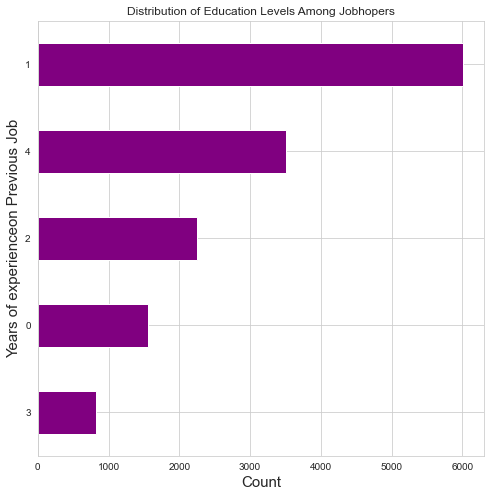

In [41]:
df_updated['last_new_job'] = [int(i.strip('><')) if i != 'never' else 0 for i in df_updated['last_new_job']]

last_job = df_updated['last_new_job'].value_counts().sort_values()

# create a donut chart to visualize the distribution of 'last_new_job'
plt.figure(figsize= (8,8))
last_job.plot(kind = 'barh',color='purple')

# Set axis labels and title
plt.xlabel('Count', size = 15)
plt.ylabel('Years of experienceon Previous Job', size = 15)
plt.title('Distribution of Education Levels Among Jobhopers')

# Show the plot
plt.show()

> <b> Inferences :

* The distribution of the last_new_job feature among jobhopers in the dataset shows that most jobhopers have either been in their current job for less than a year or have not had a job before. However, there are also a significant number of jobhopers who have been in their current job for 4 years or more, which may indicate that they are either satisfied with their current job or have difficulty finding a new one. Overall, the distribution suggests that jobhopers in the dataset tend to have shorter job tenures.


_________________________

## <b> CORRELATION MATRIX 

In [12]:
df_updated.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,4,18,1.0


### <b> Computing the correlation matrix between the numerical columns in the DataFrame, such as city_development_index, experience, last_new_job, training_hours, and target

In [13]:
df_correlation = df_updated[['city_development_index','relevent_experience','education_level','experience','last_new_job', 'training_hours','target']]


# Converting some categorical features to integer and correcting some data types 

df_correlation['relevent_experience']   = df_correlation['relevent_experience'].map({'Has relevent experience': 1, 'No relevent experience': 0})
df_correlation['education_level']       = df_correlation['education_level'].map({'Primary School':1,'High School':2,'Graduate':3, 'Masters':4, 'Phd':5} )
df_correlation['experience']            = [int(i.strip('><')) for i in df_correlation['experience']]



In [14]:
df_correlation.head()

,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,target
0,0.920,1,3,20,1,36,1.0
1,0.776,0,3,15,4,47,0.0
4,0.767,1,4,20,4,8,0.0
6,0.920,1,2,5,1,24,0.0
7,0.762,1,3,13,4,18,1.0


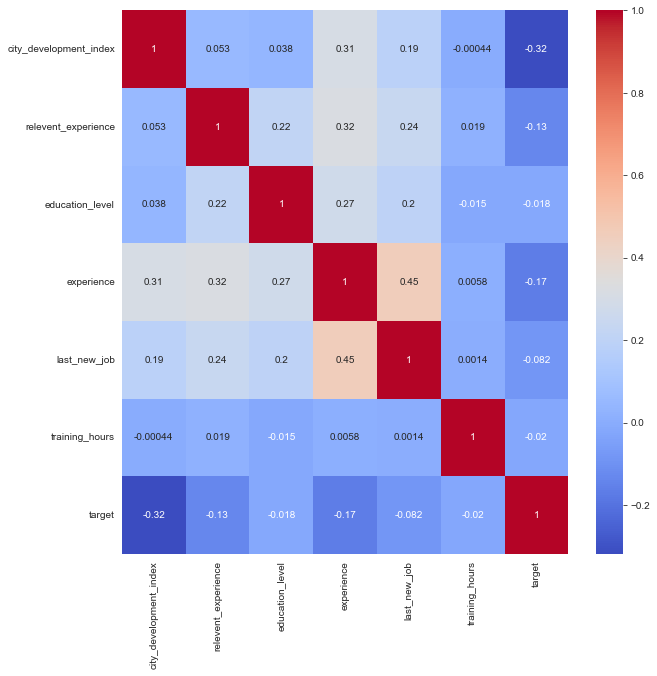

In [15]:
# Getting the correlation Matrix 

# calculate the correlation matrix
corr_matrix = df_correlation.corr()
plt.figure(figsize = (10,10))
# plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

> <b> Inferences :

* The only features having failry good linear correlations are : 'last_new_job' vs 'experience' and 'experice' vs 'relevent_experience'

* 'last_new_job' and 'experience' have a fairly good positive linear correlation, which means that candidates who have more experience are likely to have worked at their last job for a longer period of time.

* 'experience' and 'relevant_experience' also have a fairly good positive linear correlation, which means that candidates who have relevant experience are likely to have more overall experience.

____________________________